# Final Project Submission


* Student name: Bradly Horn and Victor Chen
* Student pace: full time
* Scheduled project review date/time: June 4th, 2021
* Instructor name: Max Barry

## Business Understanding:

Our client is Genesis Capital's 'Fix & Flip' Division, a department within the real estate lending corporation in charge of lending to and participating in flipping houses. They are interested in the possibility of looking at the housing market in King County, Washington. 


What is important to them, as a lender, is the pricing of the houses in King County. The features that affect price the most should be our goals for the model, as well as finding out the features to ignore and the features that negatively affect price. 

#### Business Question:

1. What features affect price the most?

2. What features should Genesis Capital pursue, ignore, or avoid?

## Data Understanding

### Imports and Opening CSV

First, let's take a look at the data we have available to us:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# import geopandas as gpd
# from shapely.geometry import Point,Polygon
# import descartes

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Interpretation:

This data set is a record of house sales in King County, Washington, between 2014 and 2015. It includes information like the number of bedrooms, square footage (important!), condition, the year it was built, the year it was renovated (if applicable), and the zipcode and latitude/longitude. From this data, we can extrapolate location, age of the house, and size of the house, giving us a good look at how these factors affect the price. 


Target: Price

Available Predictors: bedrooms, bathrooms, square footage of living space, square footage of the lot, numuber of floors, waterfront house or not, number of viewers, condition based on a numeric scale, grade based on a numeric scale, square footage of the basement, year the house was built, year the house was renovated, zipcode, latitude/longitude, and square footage of living space of the nearest 15 neighbors

In [4]:
df.shape

(21597, 21)

We have 21,597 entries, with 21 columns of predictors

## Data Preparation:

### Imports and Opening CSV

Here, we see that there are some null values that need cleaning, as well as a couple of columns that are in string form rather than integer or float form like we prefer.

### Start of Data Cleaning
To do list: 

'date' needs to be changed from string to datetime 

'waterfront'   needs null values filled

'view'        

'yr_renovated' 

'sqft_basement' needs to be changed from string to float 

In [5]:
# instantiating a copy of the original data set which we will use to clean, and later on for modeling
df_clean = df.copy()

In [6]:
# changing 'date' column to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [7]:
# examining the 'waterfront' null entries
df_clean['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
# i assume here that na means 0
df_clean['waterfront'].fillna(0, inplace=True)
df_clean['waterfront'].isna().sum()

0

In [9]:
# examining the 'view' null entries
df_clean['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [10]:
# i assume here that na means 0
df_clean['view'].fillna(0, inplace=True)
df_clean['view'].isna().sum()

0

In [11]:
# examining 'yr_renovated' null entries
df_clean['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
# i assume here that na means 0
df_clean['yr_renovated'].fillna(0, inplace=True)
df_clean['yr_renovated'].isna().sum()

0

In [13]:
# examining 'sqft_basement' string values
df_clean['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1816.0        1
666.0         1
2720.0        1
2360.0        1
652.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [14]:
# replacing strings with floats
df_clean['sqft_basement'].replace(to_replace = '?', value = 0.0, inplace = True)

In [15]:
df_clean['sqft_basement'] = df_clean['sqft_basement'].astype(float)

In [16]:
df_clean['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [17]:
# checking to make sure we cleaned all the columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [18]:
# save the cleaned csv back into our data folder
df_clean.to_csv('data/kc_house_data_clean.csv', index=False)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Modeling

### FSM
First Simple Model

Just a quick first model based on the correlations we see above. Working with **price** and **sqft_living**, as they are highly correlated (both logically and looking at the correlation table below)

In [19]:
# look at correlations to find a starting point for our FSM
df_clean.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


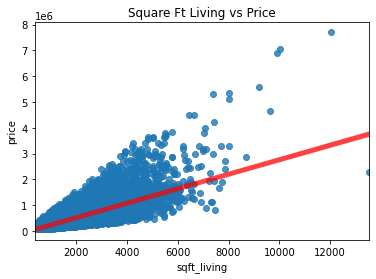

In [20]:
# A regplot to look at the correlation between price and square foot living
sns_plot = sns.regplot(x=df['sqft_living'], y=df['price'], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title='Square Ft Living vs Price')


plt.savefig('images/fsm_corr.png')

Null Hypothesis: Square footage does not affect price

Alternate Hypothesis: Square footage does affect price

alpha = 0.05

In [21]:
# start of fsm (first simple model)
# in this case it seems like it will be sqft_living

formula = 'price ~ sqft_living'
df_fsm = ols(formula, df_clean).fit()
df_fsm_summ = df_fsm.summary()
df_fsm_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:02   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We reject the null hypothesis that square footage does not affect price. The p-value is 0, which is less than alpha of 0.05

Let's take a quick look at the QQ-Plot at this point, with just the basic linear regression model

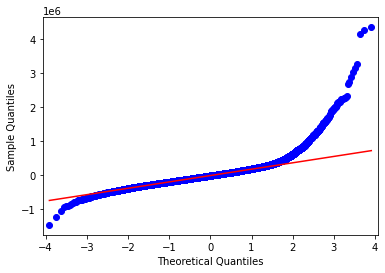

In [22]:
qqplot(df_fsm.resid, line = 'q')
plt.savefig('images/fsm_resid.png')

As we can see here, the model actually does predict relatively well, especially among the more central quantiles. However, when the prices get high, the variance starts to increase dramatically. 

### Features
Starting from this point, we ask questions about what we want to glean from the model and state null and alternate hypotheses for each. We want to find whether or not each question we ask, relating to price, can be answered in a statistically significant way. 

#### Bedrooms

Question: Does the number of bedrooms in the house affect housing price? House flippers could use this as a way to decide the ideal number of rooms in a potential house. 


Hypothesis Testing: 
- Null: The 'condition' of the house has no relationship with the price of the house
- Alternative: The 'condition' of the house does have a relationship with the price of the house

In [23]:
formula = 'price ~ sqft_living + bedrooms'
model = ols(formula, df_clean).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:02   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.091e+04   6638.826     12.187      0.000    6.79e+04    9.39e+04
sqft_living   314.6011      2.344    134.232      0.000     310.007     319.195
bedrooms    -5.783e+04   2322.987    -24.896      0.000   -6.24e+04   -5.33e+04
==============================================================================
Omnibus:                    14391.571   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488612.629
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.654   Cond. No.                     8.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

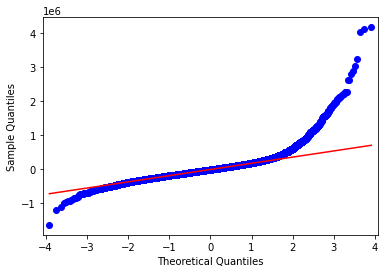

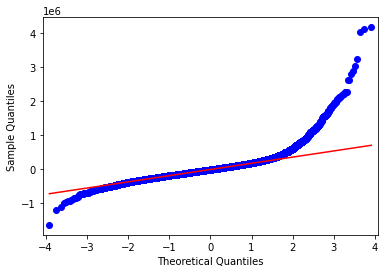

In [24]:
qqplot(model.resid, line = 'q')

Looking at this model, bedroom does increase our R-Squared marginally. Strangely, the coefficient for bedrooms is -5.783e+04. Somehow, according to our model, adding more bedrooms to a house actually decreases the price. 

### Sqft_lot

In [25]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot'
second_model = ols(formula, df_clean).fit()
second_model_summary = second_model.summary()
second_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7451.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:03   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.994e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.424e+04   6637.291     12.692      0.000    7.12e+04    9.72e+04
sqft_living   318.6333      2.383    133.727      0.000     313.963     323.304
bedrooms    -5.959e+04   2327.075    -25.605      0.000   -6.41e+04    -5.5e+04
sqft_lot       -0.3847      0.043     -8.922      0.000      -0.469      -0.300
==============================================================================
Omnibus:                    14308.034   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           477721.465
Skew:                           2.710   Prob(JB):                         0.00
Kurtosis:                      25.394   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a marginal increase in R-Squared, from 0.507 to 0.509

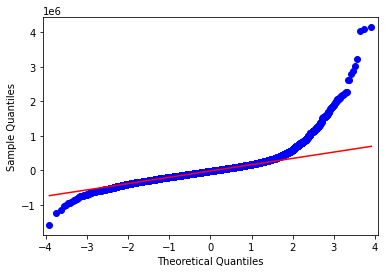

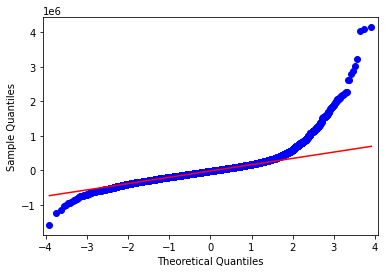

In [26]:
qqplot(second_model.resid, line = 'q')

### Floors (Fails our tests)
The number of floors, while difficult to change (most cities require permits and approvals to add another floor to a building), is something that we definitely want to examine. 

In [27]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + floors'
third_model = ols(formula, df_clean).fit()
third_model_summary = third_model.summary()
third_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5588.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:03   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.994e+05
Df Residuals:                   21592   BIC:                         5.995e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.295e+04   7699.144     10.773      0.000    6.79e+04     9.8e+04
sqft_living   318.3662      2.516    126.560      0.000     313.436     323.297
bedrooms    -5.955e+04   2329.114    -25.569      0.000   -6.41e+04    -5.5e+04
sqft_lot       -0.3836      0.043     -8.871      0.000      -0.468      -0.299
floors       1153.7566   3483.946      0.331      0.741   -5675.036    7982.549
==============================================================================
Omnibus:                    14316.176   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478692.091
Skew:                           2.712   Prob(JB):                         0.00
Kurtosis:                      25.417   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This predictor actually does not increase our R_Squared at all. In addition, the p-value is 0.741, which is ridiculously high. We can rule this out as a predictor for our target of price. We will remove this from future models as it fails our tests.


In simple terms, surprisingly, increasing the number of floors does not raise our predicted price in a significant manner.

#### Business Application:

Seeing as this predictor fails in our model, we would say that, when using our model, the user should ignore the number of floors (as abstract and counterintuitive as that sounds). 

### Waterfront

In [28]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + waterfront'
fourth_model = ols(formula, df_clean).fit()
fourth_model_summary = fourth_model.summary()
fourth_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6393.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:03   Log-Likelihood:            -2.9895e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.980e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     7.98e+04   6407.861     12.453      0.000    6.72e+04    9.24e+04
sqft_living   306.8244      2.319    132.304      0.000     302.279     311.370
bedrooms    -5.267e+04   2253.015    -23.377      0.000   -5.71e+04   -4.83e+04
sqft_lot       -0.3795      0.042     -9.117      0.000      -0.461      -0.298
waterfront   8.281e+05   2.08e+04     39.774      0.000    7.87e+05    8.69e+05
==============================================================================
Omnibus:                    13010.708   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387053.287
Skew:                           2.388   Prob(JB):                         0.00
Kurtosis:                      23.182   Cond. No.                     5.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

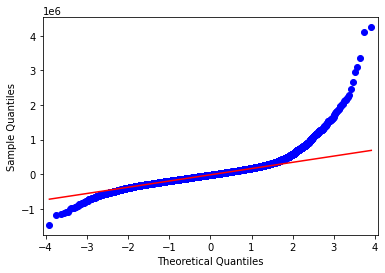

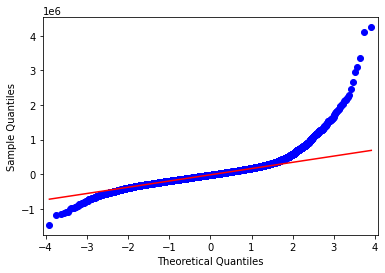

In [29]:
qqplot(fourth_model.resid, line = 'q')

Waterfront raises out R-Square by a lot, and passes our p-value tests. 

### Year Built

In [30]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + waterfront + yr_built'
fifth_model = ols(formula, df_clean).fit()
fifth_model_summary = fifth_model.summary()
fifth_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     5765.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:03   Log-Likelihood:            -2.9823e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21591   BIC:                         5.965e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.521e+06   1.15e+05     39.241      0.000     4.3e+06    4.75e+06
sqft_living   332.5677      2.340    142.120      0.000     327.981     337.154
bedrooms    -5.619e+04   2181.027    -25.764      0.000   -6.05e+04   -5.19e+04
sqft_lot       -0.3884      0.040     -9.647      0.000      -0.467      -0.309
waterfront   7.779e+05   2.02e+04     38.553      0.000    7.38e+05    8.17e+05
yr_built    -2274.2348     58.912    -38.604      0.000   -2389.706   -2158.763
==============================================================================
Omnibus:                    12469.962   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           366161.340
Skew:                           2.248   Prob(JB):                         0.00
Kurtosis:                      22.665   Cond. No.                     3.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

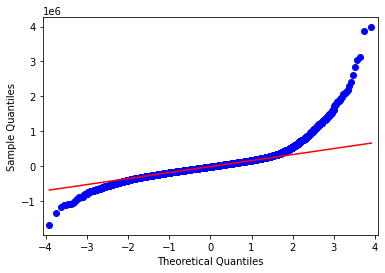

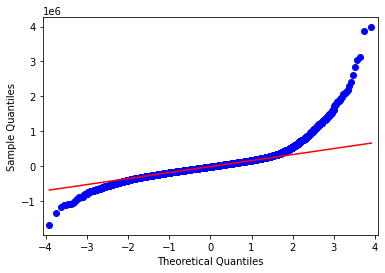

In [31]:
qqplot(fifth_model.resid, line = 'q')

### Bathrooms

In [32]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + waterfront + yr_built + bathrooms'
sixth_model = ols(formula, df_clean).fit()
sixth_model_summ = sixth_model.summary()
sixth_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     4989.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:04   Log-Likelihood:            -2.9800e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21590   BIC:                         5.961e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.69e+06   1.26e+05     45.167      0.000    5.44e+06    5.94e+06
sqft_living   293.4639      2.930    100.173      0.000     287.722     299.206
bedrooms    -6.449e+04   2190.914    -29.436      0.000   -6.88e+04   -6.02e+04
sqft_lot       -0.3378      0.040     -8.467      0.000      -0.416      -0.260
waterfront   7.704e+05      2e+04     38.592      0.000    7.31e+05     8.1e+05
yr_built    -2896.7544     64.909    -44.628      0.000   -3023.981   -2769.528
bathrooms    7.892e+04   3623.794     21.778      0.000    7.18e+04     8.6e+04
==============================================================================
Omnibus:                    12594.682   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381709.994
Skew:                           2.270   Prob(JB):                         0.00
Kurtosis:                      23.089   Cond. No.                     3.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

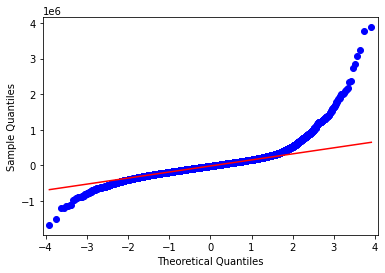

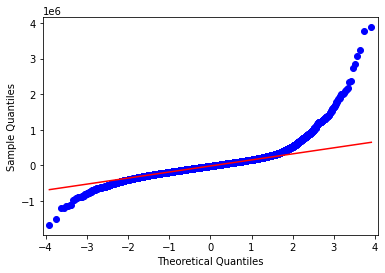

In [33]:
qqplot(sixth_model.resid, line = 'q')

As we can see from each iteration, we are increasing our R-Squared while maintaining a low p-value. 

### Zipcodes

In [34]:
dummy = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=True)
df_dummy = pd.concat([df, dummy], axis=1)
dummy_formula = ''
dummy_formula = ' + '.join(df_dummy.columns[-((len(df['zipcode'].value_counts())-1)):])

In [35]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + floors + waterfront + yr_built + bathrooms +' + dummy_formula
seventh_model = ols(formula, df_dummy).fit()
seventh_summary = seventh_model.summary()

seventh_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     891.0
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:04   Log-Likelihood:            -2.5929e+05
No. Observations:               19221   AIC:                         5.187e+05
Df Residuals:                   19144   BIC:                         5.193e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.167e+06   1.27e+05      9.226      0.000    9.19e+05    1.42e+06
sqft_living     256.9303      2.407    106.727      0.000     252.212     261.649
bedrooms      -4.106e+04   1746.058    -23.514      0.000   -4.45e+04   -3.76e+04
sqft_lot          0.2490      0.034      7.281      0.000       0.182       0.316
floors        -4104.8412   3152.510     -1.302      0.193   -1.03e+04    2074.355
waterfront     8.651e+05   1.51e+04     57.472      0.000    8.36e+05    8.95e+05
yr_built       -650.5665     64.950    -10.016      0.000    -777.874    -523.259
bathrooms      2.637e+04   2979.508      8.851      0.000    2.05e+04    3.22e+04
zipcode_98002  2.107e+04   1.63e+04      1.293      0.196   -1.09e+04     5.3e+04
zipcode_98003  5718.9556   1.46e+04      0.391      0.696    -2.3e+04    3.44e+04
zipcode_98004  8.196e+05   1.43e+04     57.184      0.000    7.92e+05    8.48e+05
zipcode_98005  3.362e+05    1.7e+04     19.740      0.000    3.03e+05     3.7e+05
zipcode_98006   3.28e+05   1.29e+04     25.427      0.000    3.03e+05    3.53e+05
zipcode_98007  2.768e+05   1.86e+04     14.843      0.000     2.4e+05    3.13e+05
zipcode_98008  2.848e+05   1.47e+04     19.435      0.000    2.56e+05    3.13e+05
zipcode_98010  6.236e+04   2.12e+04      2.945      0.003    2.09e+04    1.04e+05
zipcode_98011  1.222e+05   1.64e+04      7.450      0.000    9.01e+04    1.54e+05
zipcode_98014   7.69e+04   1.95e+04      3.934      0.000    3.86e+04    1.15e+05
zipcode_98019  6.846e+04   1.67e+04      4.103      0.000    3.58e+04    1.01e+05
zipcode_98022  2.679e+04   1.56e+04      1.714      0.087   -3847.646    5.74e+04
zipcode_98023 -2.029e+04   1.27e+04     -1.593      0.111   -4.53e+04    4678.668
zipcode_98024  1.405e+05   2.28e+04      6.157      0.000    9.58e+04    1.85e+05
zipcode_98027   1.71e+05   1.33e+04     12.851      0.000    1.45e+05    1.97e+05
zipcode_98028  1.247e+05   1.46e+04      8.528      0.000    9.61e+04    1.53e+05
zipcode_98029  2.349e+05   1.42e+04     16.599      0.000    2.07e+05    2.63e+05
zipcode_98030  5174.4734    1.5e+04      0.346      0.730   -2.42e+04    3.45e+04
zipcode_98031  1.878e+04   1.48e+04      1.268      0.205   -1.02e+04    4.78e+04
zipcode_98032  1.345e+04    1.9e+04      0.708      0.479   -2.38e+04    5.07e+04
zipcode_98033  3.924e+05   1.33e+04     29.586      0.000    3.66e+05    4.18e+05
zipcode_98034  2.154e+05   1.25e+04     17.182      0.000    1.91e+05     2.4e+05
zipcode_98038   2.79e+04   1.24e+04      2.259      0.024    3693.059    5.21e+04
zipcode_98039  1.374e+06    2.8e+04     48.981      0.000    1.32e+06    1.43e+06
zipcode_98040  5.731e+05   1.49e+04     38.391      0.000    5.44e+05    6.02e+05
zipcode_98042  1.246e+04   1.25e+04      0.995      0.320   -1.21e+04     3.7e+04
zipcode_98045   1.07e+05    1.6e+04      6.670   

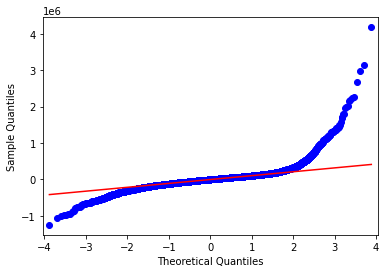

In [36]:
qqplot(seventh_model.resid, line = 'q')
plt.savefig('images/pre_transform_final_model.png')

### Log Transformations
We take a look to see if log transformations will help us interpret our data in a more effective way

Log transformation of target:

In [37]:
# We might be able to do a log transform of price here to see how the final model looks with it
df_log = df_dummy.copy()
non_normal = ['price']
for feat in non_normal:
    df_log[feat] = df_clean[feat].map(lambda x: np.log(x))

In [38]:
outcome = 'price'
formula = outcome + '~ sqft_living + bedrooms + sqft_lot + waterfront + yr_built + bathrooms + ' + dummy_formula
model = ols(formula=formula, data=df_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1348.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:50:05   Log-Likelihood:                 2681.1
No. Observations:               19221   AIC:                            -5210.
Df Residuals:                   19145   BIC:                            -4613.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.2288      0.141     86.961      0.000      11.953      12.504
sqft_living       0.0003   2.89e-06    107.527      0.000       0.000       0.000
bedrooms         -0.0163      0.002     -7.756      0.000      -0.020      -0.012
sqft_lot       7.433e-07   4.12e-08     18.059      0.000    6.63e-07    8.24e-07
waterfront        0.6803      0.018     37.537      0.000       0.645       0.716
yr_built         -0.0002   7.15e-05     -2.749      0.006      -0.000   -5.65e-05
bathrooms         0.0490      0.004     13.863      0.000       0.042       0.056
zipcode_98002    -0.0478      0.020     -2.435      0.015      -0.086      -0.009
zipcode_98003     0.0412      0.018      2.339      0.019       0.007       0.076
zipcode_98004     1.1865      0.017     68.743      0.000       1.153       1.220
zipcode_98005     0.8234      0.020     40.164      0.000       0.783       0.864
zipcode_98006     0.7487      0.016     48.196      0.000       0.718       0.779
zipcode_98007     0.7189      0.022     32.014      0.000       0.675       0.763
zipcode_98008     0.7036      0.018     39.893      0.000       0.669       0.738
zipcode_98010     0.2541      0.025      9.966      0.000       0.204       0.304
zipcode_98011     0.4733      0.020     23.955      0.000       0.435       0.512
zipcode_98014     0.2750      0.024     11.683      0.000       0.229       0.321
zipcode_98019     0.3209      0.020     15.972      0.000       0.281       0.360
zipcode_98022     0.0931      0.019      4.943      0.000       0.056       0.130
zipcode_98023    -0.0010      0.015     -0.065      0.948      -0.031       0.029
zipcode_98024     0.4203      0.027     15.294      0.000       0.366       0.474
zipcode_98027     0.5397      0.016     33.679      0.000       0.508       0.571
zipcode_98028     0.4396      0.018     24.959      0.000       0.405       0.474
zipcode_98029     0.6547      0.017     38.471      0.000       0.621       0.688
zipcode_98030     0.0620      0.018      3.442      0.001       0.027       0.097
zipcode_98031     0.0909      0.018      5.095      0.000       0.056       0.126
zipcode_98032    -0.0221      0.023     -0.966      0.334      -0.067       0.023
zipcode_98033     0.8357      0.016     52.325      0.000       0.804       0.867
zipcode_98034     0.5683      0.015     37.655      0.000       0.539       0.598
zipcode_98038     0.1794      0.015     12.064      0.000       0.150       0.209
zipcode_98039     1.3276      0.034     39.313      0.000       1.261       1.394
zipcode_98040     0.9866      0.018     54.880      0.000       0.951       1.022
zipcode_98042     0.0832      0.015      5.519      0.000       0.054       0.113
zipcode_98045     0.3484      0.019     18.029      0.000       0.311       0.386
zipcode_98052     0.6927      0.015     46.246   

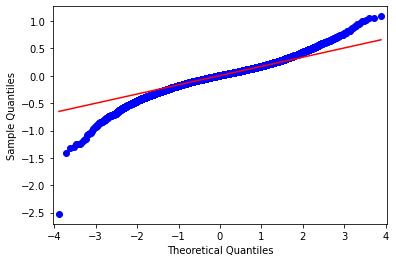

In [39]:
qqplot(model.resid, line = 'q')
plt.savefig('images/log_transform_final_model.png')

As we can see, the log transformation of the target variable does significantly improve the model. The R-Squared jumps from 0.779 to 0.840

Looking at the comparison of QQ plots, this also gives us an idea that the regression line we modeled is more accurate after log transforming the target variable. The excessive residuals on the right side of the plot as the quantiles get higher is much reduced by the normalizing of our target variable

## Conclusion

Overall, our final model had the following features: 

Target: Price

Features: sqft_living, sqft_lot, bedrooms, waterfront, yr_built, and zipcode (as categoricals)

Adjusted R-Squared: 0.840

According to our final model, Genesis Capital needs to pay the most attention to whether or not the property is a waterfront property. Waterfront properties get a huge price boost in our model. Square foot living space, unsurprisingly, is another steady and significant coefficient. Bathrooms also significantly raise the price. 

Negative coefficients include the number of bedrooms (surprisingly!), and as the year the house was built increases, there is actually a slight decrease in price. This could be due to extraneous factors such as modern housing being smaller and more space-efficient than older houses. 

According to our model, a house with a high predicted price would have the following features: 

1. A waterfront view
2. Many bathrooms
3. A large square footage of living space
4. Location in an expensive area

Finally, we isolated some of the most expensive zipcodes: 

1. 98039 - Medina
2. 98004 - Bellevue
3. 98112 - Seattle